In [2]:
import pandas as pd
import numpy as np
def get_path(num: int):
    return f"/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_{num}.json"
    # return f"file:/data/MyData 3/endsong_{num}.json"

path_list = []
print(type(path_list))
for i in range(0, 10):
    path_list.insert(i, get_path(i))

print(path_list)

<class 'list'>
['/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_0.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_1.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_2.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_3.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_4.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_5.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_6.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_7.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_8.json', '/Users/madslun/Documents/Programmering/Project work - BDA/data/MyData 3/endsong_9.json']


In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, DateType, TimestampType, LongType, BooleanType


spotify_schema = StructType(fields=[
    StructField("ts", DateType()),
    StructField("username", StringType()),
    StructField("platform", StringType()),
    StructField("ms_played", LongType()),
    StructField("ip_addr_decrypted", StringType()),
    StructField("user_agent_decrypted", StringType()),
    StructField("master_metadata_track_name", StringType()),
    StructField("master_metadata_album_artist_name", StringType()),
    StructField("master_metadata_album_album_name", StringType()),
    StructField("episode_name", StringType()),
    StructField("episode_show_name", StringType()),
    StructField("spotify_episode_uri", StringType()),
    StructField("reason_start", StringType()),
    StructField("reason_end", StringType()),
    StructField("shuffle", BooleanType()),
    StructField("skipped", StringType()),
    StructField("offline", DoubleType()),
    StructField("offline_timestamp", StringType()),
    StructField("incognito_mode", DoubleType())
])

spark = SparkSession.builder.appName("Spotify-data").getOrCreate()

df = spark.read\
    .option("multiline","true")\
    .json(path_list)

23/02/12 18:57:58 WARN Utils: Your hostname, Madss-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.107 instead (on interface en0)
23/02/12 18:57:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/12 18:57:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/02/12 18:58:00 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/02/12 18:58:00 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [4]:
df.printSchema()

root
 |-- conn_country: string (nullable = true)
 |-- episode_name: string (nullable = true)
 |-- episode_show_name: string (nullable = true)
 |-- incognito_mode: boolean (nullable = true)
 |-- ip_addr_decrypted: string (nullable = true)
 |-- master_metadata_album_album_name: string (nullable = true)
 |-- master_metadata_album_artist_name: string (nullable = true)
 |-- master_metadata_track_name: string (nullable = true)
 |-- ms_played: long (nullable = true)
 |-- offline: boolean (nullable = true)
 |-- offline_timestamp: long (nullable = true)
 |-- platform: string (nullable = true)
 |-- reason_end: string (nullable = true)
 |-- reason_start: string (nullable = true)
 |-- shuffle: boolean (nullable = true)
 |-- skipped: boolean (nullable = true)
 |-- spotify_episode_uri: string (nullable = true)
 |-- spotify_track_uri: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- user_agent_decrypted: string (nullable = true)
 |-- username: string (nullable = true)



In [5]:
from pyspark.sql.functions import to_timestamp

print(df.first())
df = df.withColumn("time", to_timestamp("ts"))
df.first()

Row(conn_country='NO', episode_name=None, episode_show_name=None, incognito_mode=False, ip_addr_decrypted='128.39.67.89', master_metadata_album_album_name='Stoney', master_metadata_album_artist_name='Post Malone', master_metadata_track_name='Too Young', ms_played=237146, offline=False, offline_timestamp=1548350825399, platform='Android OS 9 API 28 (HUAWEI, CLT-L29)', reason_end='trackdone', reason_start='trackdone', shuffle=False, skipped=None, spotify_episode_uri=None, spotify_track_uri='spotify:track:4SYUUlkScpNR1QvPscXf8t', ts='2019-01-24T17:31:25Z', user_agent_decrypted='unknown', username='mads12')


Row(conn_country='NO', episode_name=None, episode_show_name=None, incognito_mode=False, ip_addr_decrypted='128.39.67.89', master_metadata_album_album_name='Stoney', master_metadata_album_artist_name='Post Malone', master_metadata_track_name='Too Young', ms_played=237146, offline=False, offline_timestamp=1548350825399, platform='Android OS 9 API 28 (HUAWEI, CLT-L29)', reason_end='trackdone', reason_start='trackdone', shuffle=False, skipped=None, spotify_episode_uri=None, spotify_track_uri='spotify:track:4SYUUlkScpNR1QvPscXf8t', ts='2019-01-24T17:31:25Z', user_agent_decrypted='unknown', username='mads12', time=datetime.datetime(2019, 1, 24, 18, 31, 25))

In [6]:
from pyspark.sql.functions import month, hour, year

years = df.groupby(year('time')).count().collect()
months = df.groupby(month('time')).count().collect()
hours = df.groupby(hour('time')).count().collect()

Text(0.5, 1.0, 'Listening by years')

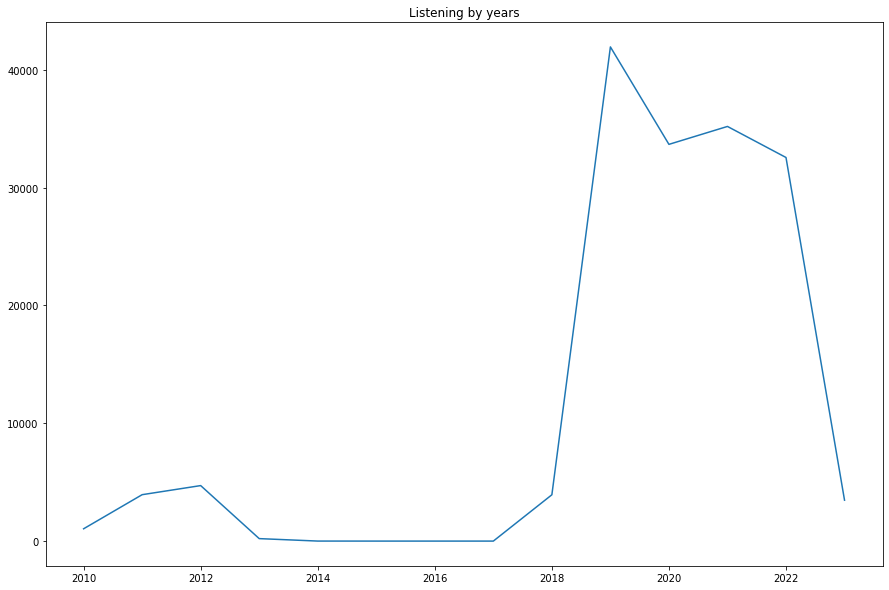

In [17]:
import matplotlib.pyplot as plt

yrs = dict(years)
for i in range (2015, 2018):
    yrs[i] = 0

yrs = dict(sorted(yrs.items()))
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(yrs.keys(), yrs.values())
ax.set_title("Listening by years")


Text(0.5, 1.0, 'Monthly listening')

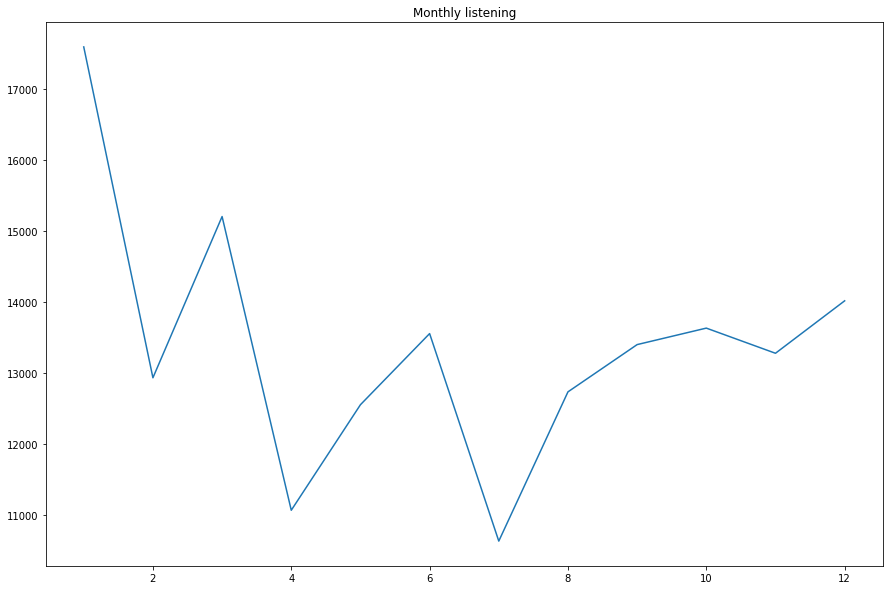

In [18]:
import matplotlib.pyplot as plt

tmp = dict(months)
tmp = dict(sorted(tmp.items()))

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(tmp.keys(), tmp.values())
ax.set_title("Monthly listening")


{0: 8483, 1: 4837, 2: 2321, 3: 1756, 4: 1546, 5: 1212, 6: 1345, 7: 3754, 8: 6102, 9: 7195, 10: 7218, 11: 8053, 12: 7810, 13: 8706, 14: 9200, 15: 9551, 16: 10153, 17: 8869, 18: 8314, 19: 8240, 20: 7179, 21: 7261, 22: 9363, 23: 12154}


Text(0.5, 1.0, 'Hourly listening')

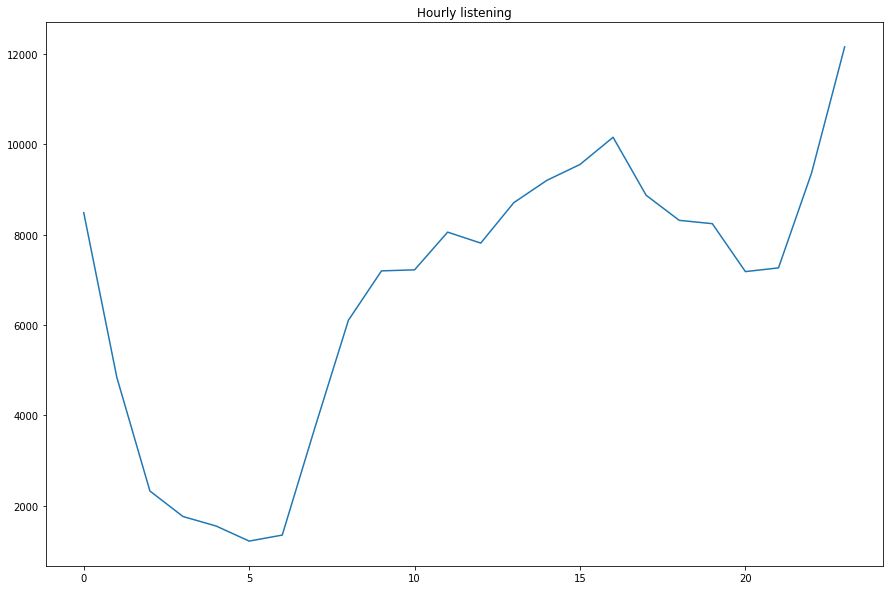

In [16]:
import matplotlib.pyplot as plt

tmp = dict(hours)
tmp = dict(sorted(tmp.items()))

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(tmp.keys(), tmp.values())
ax.set_title("Hourly listening")


In [10]:
months_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

In [11]:
def dict_num_to_months(input_dict):
    new_dict = {}
    for i in range(1, 13):
        try:
            new_dict[months_dict[i]] = input_dict[i]
        except KeyError as e:
            new_dict[months_dict[i]] = 0
    return new_dict

In [12]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired

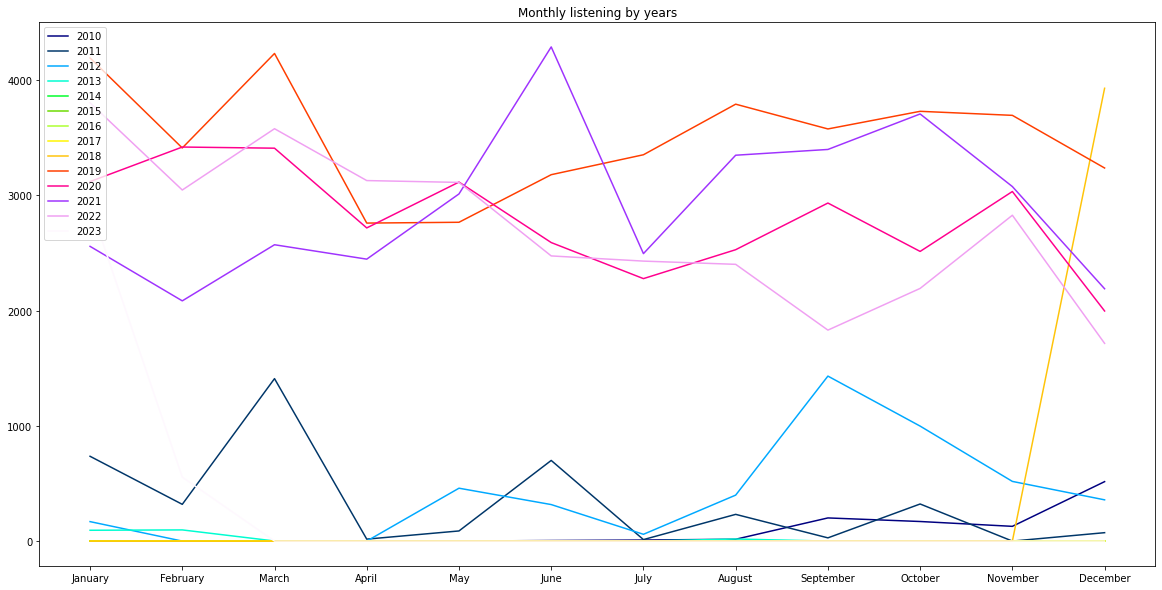

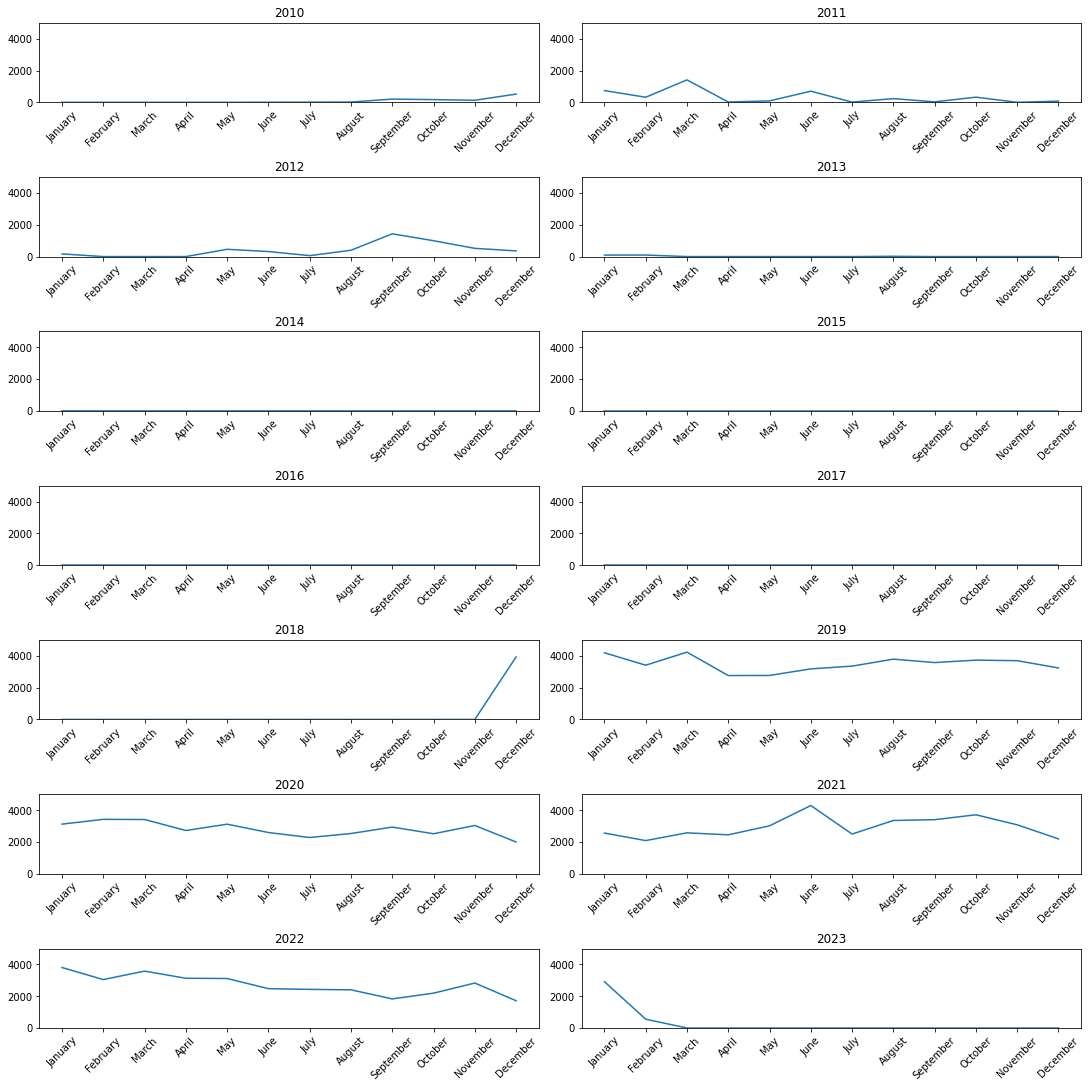

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Monthly listening by years")

fig2, ax2= plt.subplots(nrows=7, ncols=2, figsize=(15,15), constrained_layout=True)
i = 0
j = 0
colors = [colormap(i) for i in np.linspace(0, 1,len(yrs))]
for yr in yrs:
    tmp = df.where(year('time') == yr).groupby(month('time')).count().collect()
    tmp = dict(sorted(dict(tmp).items()))
    tmp = dict_num_to_months(tmp)
    ax.plot(tmp.keys(), tmp.values(), label=str(yr), color=colors[yr-list(yrs)[0]])


    ax2[j][i].plot(tmp.keys(), tmp.values())
    ax2[j][i].set_title(str(yr))
    ax2[j][i].tick_params(axis='x', labelrotation = 45)
    ax2[j][i].set_ylim([0,5000])

    if (i+1) % 2 == 0:
        j += 1
        i = 0
    else:
        i+=1

ax.legend(loc='upper left')
plt.show()

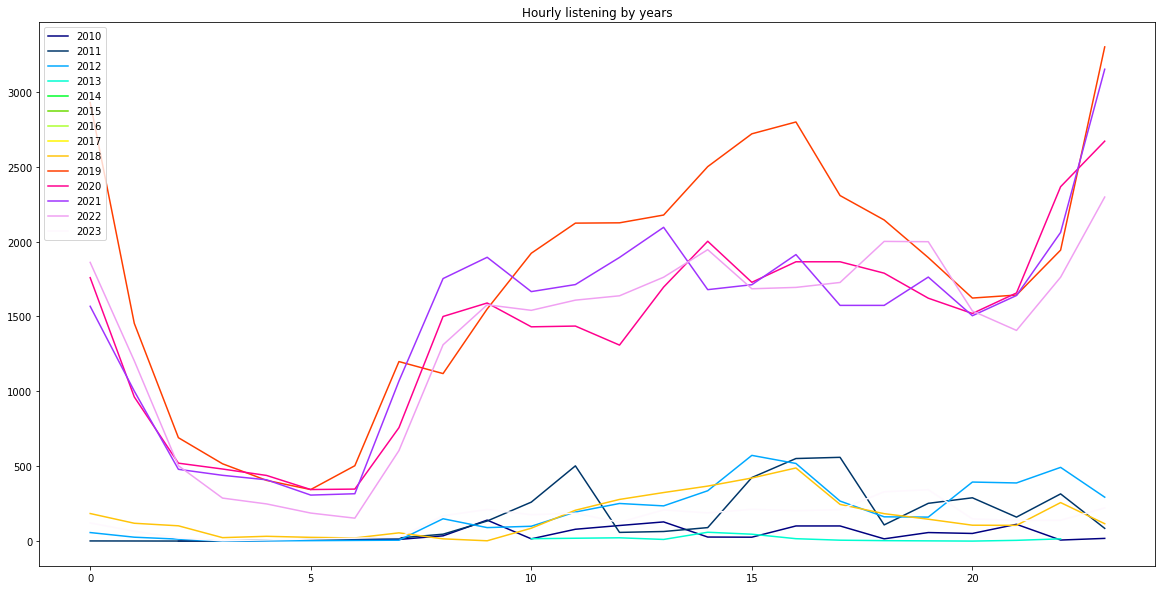

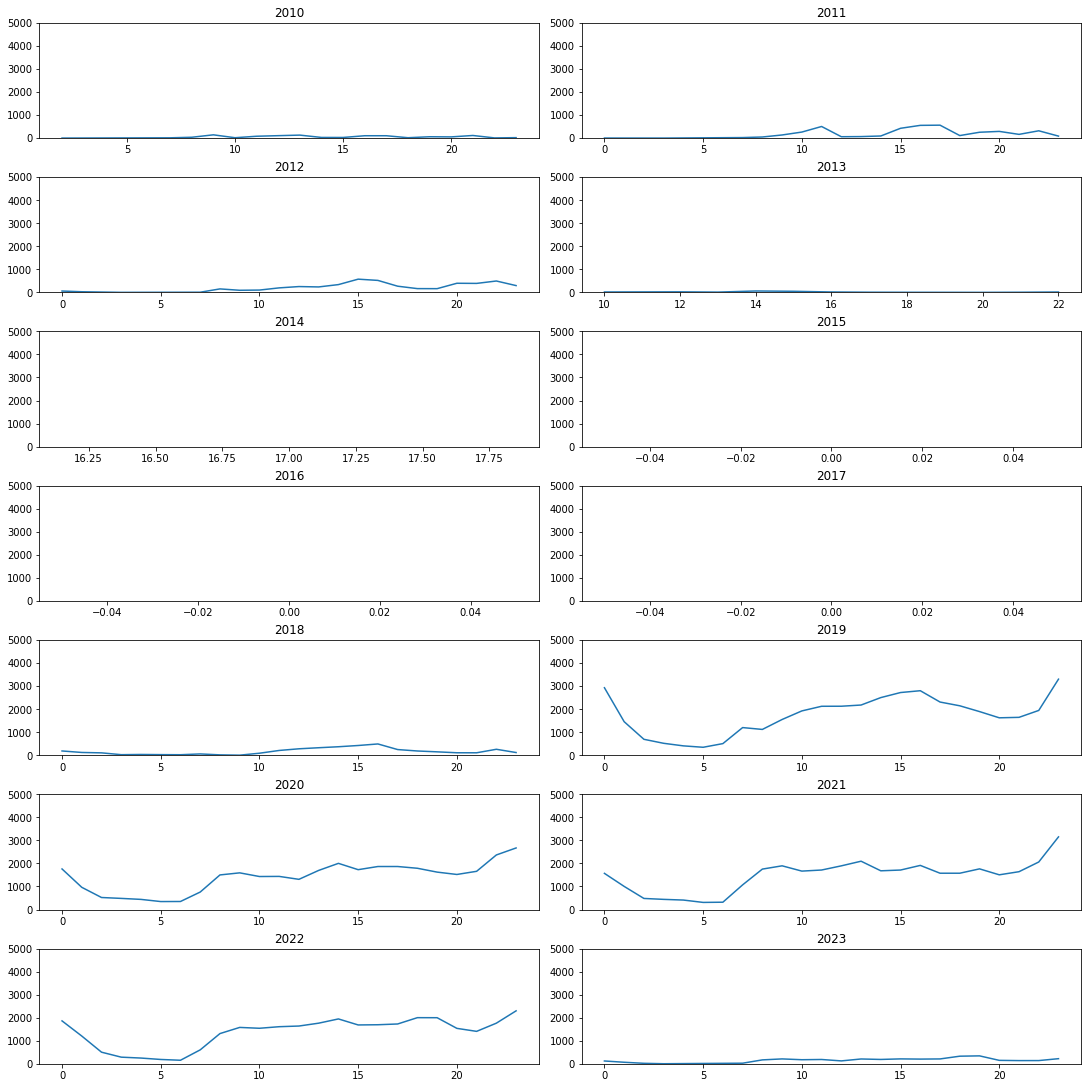

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Hourly listening by years")

fig2, ax2= plt.subplots(nrows=7, ncols=2, figsize=(15,15), constrained_layout=True)
i = 0
j = 0
colors = [colormap(i) for i in np.linspace(0, 1,len(yrs))]
for yr in yrs:
    tmp = df.where(year('time') == yr).groupby(hour('time')).count().collect()
    tmp = dict(sorted(dict(tmp).items()))

    ax.plot(tmp.keys(), tmp.values(), label=str(yr), color=colors[yr-list(yrs)[0]])

    ax2[j][i].plot(tmp.keys(), tmp.values())
    ax2[j][i].set_title(str(yr))
    ax2[j][i].set_ylim([0,5000])

    if (i+1) % 2 == 0:
        j += 1
        i = 0
    else:
        i+=1

ax.legend()
plt.show()

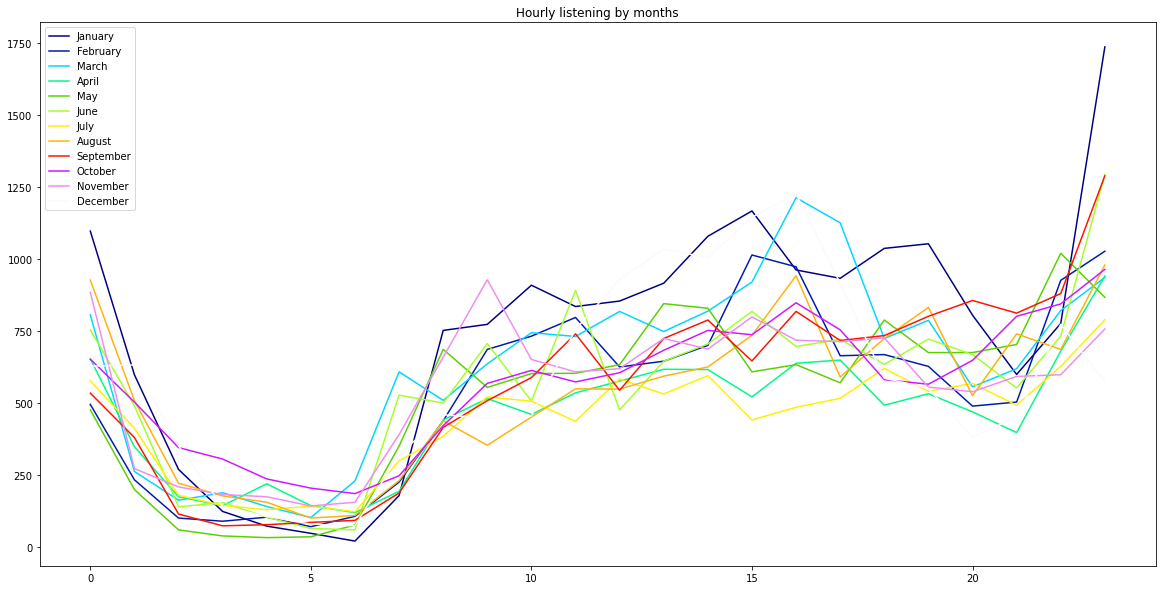

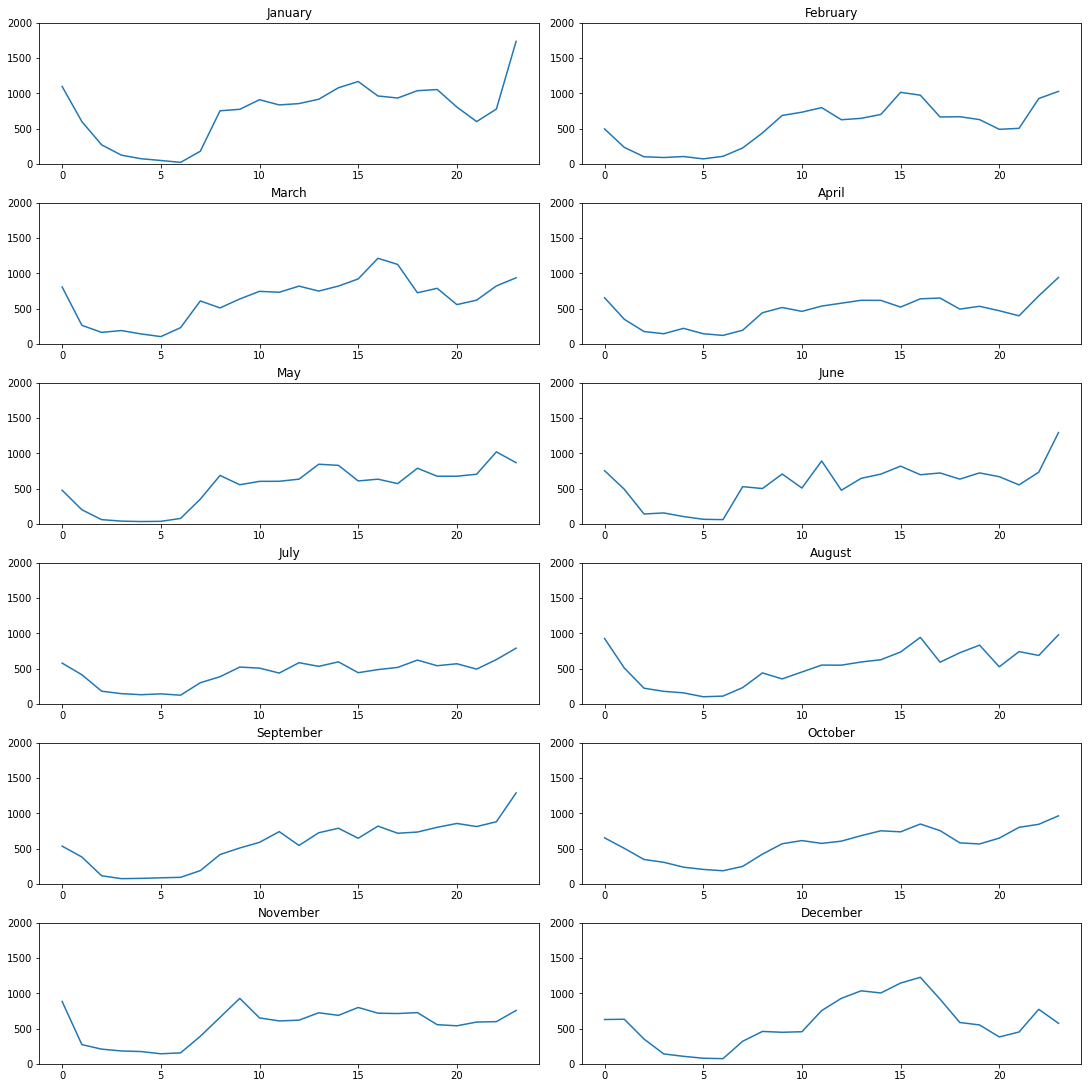

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Hourly listening by months")

fig2, ax2= plt.subplots(nrows=6, ncols=2, figsize=(15,15), constrained_layout=True)
i = 0
j = 0
colors = [colormap(i) for i in np.linspace(0, 1,len(months_dict))]
for mnth in months_dict:
    tmp = df.where(month('time') == mnth).groupby(hour('time')).count().collect()
    tmp = dict(sorted(dict(tmp).items()))

    ax.plot(tmp.keys(), tmp.values(), label=months_dict[mnth], color=colors[mnth-1])

    ax2[j][i].plot(tmp.keys(), tmp.values())
    ax2[j][i].set_title(months_dict[mnth])
    ax2[j][i].set_ylim([0,2000])

    if (i+1) % 2 == 0:
        j += 1
        i = 0
    else:
        i+=1

ax.legend()
plt.show()